
## Author : Indumathi Pandiyan

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">**Computer Vision Project** submitted for PGP-AIML Great Learning on 01-May-2022

## PART A

**DOMAIN**: Botanical Research <br>
**CONTEXT**:University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo. <br>

• **DATA DESCRIPTION**: The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data<br>

**• PROJECT OBJECTIVE:** : To create a classifier capable of determining a plant's species from a photo

## Steps and tasks: [ Total Score: 30 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Import and Understand the data [12 Marks]

### Import required libraries

In [262]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import collections
import seaborn as sns
import pandas as pd



from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

# Import label encoder
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dropout, InputLayer, BatchNormalization
from tensorflow.keras import layers

import cv2
import glob
import os


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
    
Hint: You can extract it Manually by losing 2 marks.

In [339]:
## Extract the file from zip file
import zipfile
zip_reference = zipfile.ZipFile('plant-seedlings-classification.zip', 'r')
## Extract to new folder called unzipped
zip_reference.extractall('unzipped') # unzip directory
zip_reference.close()


#### Comments:
unzipped folder got created in the file structure all the files are extracted there 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B.Map the images from train folder with train labels to form a DataFrame. [6 Marks]

In [2]:
main_dir = 'unzipped/plant-seedlings-classification'
train_dir = main_dir +'/train'

In [241]:
classes=os.listdir(train_dir)

In [242]:
classes.remove('.DS_Store')

In [245]:
len(classes)

12

In [308]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [696]:
def createDataFrame(directoryName):
    data = pd.DataFrame()
    for (root, dirs, files) in os.walk(directoryName+'/'):
        for f in files:
            if(f=='.DS_Store'):# ignoring DS store file
                continue
            #print(root)
            species_names=root.split('/')

            species_name=species_names[-1]
            #print(species_name)
            image=cv2.imread(root+'/'+f)
            #seedling_df = seedling_df.append({'species_name':species_name, 'image_name':f,'image':image,'image_path':root}, ignore_index=True)
            data = data.append({'image_path':root+'/'+f,'image_name':f,'species_name':species_name,'actual_img':[image]}, ignore_index=True)
    return data

In [697]:
seedling_df=createDataFrame(train_dir)

In [688]:
### Test Snippet to store the image in data frame and displaying it

In [674]:
test_df=pd.DataFrame()
test_img=cv2.imread('unzipped/plant-seedlings-classification/train/Black-grass/0050f38b3.png')
test_df['img']=[test_img]

In [676]:
test_df

img
0  [[[27, 50, 80], [18, 42, 71], [36, 57, 83], [45, 66, 89], [50, 71, 92], [61, 81, 100], [68, 88, ...

In [680]:
test_df.iloc[0]['img']

array([[[ 27,  50,  80],
        [ 18,  42,  71],
        [ 36,  57,  83],
        ...,
        [ 58,  85,  93],
        [ 64,  93,  99],
        [ 48,  82,  88]],

       [[ 20,  45,  77],
        [ 23,  46,  78],
        [ 39,  59,  86],
        ...,
        [ 63,  85,  94],
        [ 59,  82,  91],
        [ 49,  75,  84]],

       [[ 20,  45,  78],
        [ 26,  50,  82],
        [ 39,  59,  87],
        ...,
        [ 63,  81,  92],
        [ 58,  77,  89],
        [ 59,  78,  90]],

       ...,

       [[154, 147, 141],
        [159, 153, 146],
        [155, 149, 142],
        ...,
        [101,  96,  94],
        [ 65,  59,  64],
        [ 57,  50,  56]],

       [[155, 149, 142],
        [156, 150, 143],
        [155, 149, 141],
        ...,
        [ 94,  88,  86],
        [ 72,  66,  70],
        [ 64,  58,  62]],

       [[156, 149, 141],
        [157, 151, 143],
        [155, 149, 140],
        ...,
        [ 97,  91,  89],
        [ 72,  66,  69],
        [ 60,  54,  58]]

unzipped/plant-seedlings-classification/train/Charlock/a30113dfc.png


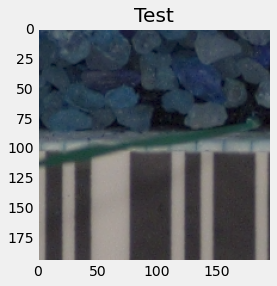

In [682]:
import matplotlib.image as image
image_det=seedling_df.iloc[500]['image_path']
print(seedling_df.iloc[500]['image_path'])
#img = image.imread(image_det)
img=test_df.iloc[0]['img']
plt.grid(False)
plt.title("Test")
new=plt.imshow(img)
plt.show()

In [685]:
seedling_df.shape

(4750, 4)

In [698]:
seedling_df.head()

actual_img  \
0  [[[[27 50 80], [18 42 71], [36 57 83], [45 66 89], [50 71 92], [ 61  81 100], [ 68  88 106], [ 6...   
1  [[[[37 43 55], [37 43 54], [40 46 57], [41 47 58], [48 53 64], [46 52 63], [47 52 64], [48 53 66...   
2  [[[[24 32 45], [21 30 44], [22 30 45], [24 31 46], [29 35 49], [25 32 44], [21 31 40], [24 34 42...   
3  [[[[ 51  84 108], [ 56  89 112], [ 54  88 110], [ 55  89 111], [ 55  89 112], [ 55  90 113], [ 5...   
4  [[[[165 162 162], [165 161 163], [160 157 158], [163 160 160], [162 161 159], [163 162 159], [16...   

      image_name  \
0  0050f38b3.png   
1  0183fdf68.png   
2  0260cffa8.png   
3  05eedce4d.png   
4  075d004bc.png   

                                                                image_path  \
0  unzipped/plant-seedlings-classification/train/Black-grass/0050f38b3.png   
1  unzipped/plant-seedlings-classification/train/Black-grass/0183fdf68.png   
2  unzipped/plant-seedlings-classification/train/Black-grass/0260cffa8.png   
3  unzipped/plant-seedlings-classification/train/Black-grass/05eedce4d.png   
4  unzipped/plant-seedlings-classification/train/Black-grass/075d004bc.png   

  species_name  
0  Black-grass  
1  Black-grass  
2  Black-grass  
3  Black-grass  
4  Black-grass

In [712]:
seedling_df.tail()

actual_img  \
4745  [[[[98 94 97], [93 88 94], [87 82 86], [82 77 80], [80 76 79], [83 80 83], [78 76 80], [73 71 78...   
4746  [[[[35 63 92], [38 67 96], [34 64 94], [17 51 84], [ 8 43 76], [19 48 80], [31 55 85], [30 52 83...   
4747  [[[[44 56 72], [52 63 75], [53 65 75], [46 59 69], [60 73 83], [48 63 74], [43 59 70], [57 71 83...   
4748  [[[[144 141 145], [143 139 143], [146 142 146], [147 144 147], [147 145 148], [145 144 146], [14...   
4749  [[[[71 90 99], [65 81 94], [68 83 97], [68 82 98], [ 70  84 101], [ 75  90 105], [ 78  95 109], ...   

         image_name  \
4745  fc293eacb.png   
4746  fc441208c.png   
4747  fed9406b2.png   
4748  fef5e7066.png   
4749  ffa401155.png   

                                                                  image_path  \
4745  unzipped/plant-seedlings-classification/train/Sugar beet/fc293eacb.png   
4746  unzipped/plant-seedlings-classification/train/Sugar beet/fc441208c.png   
4747  unzipped/plant-seedlings-classification/train/Sugar beet/fed9406b2.png   
4748  unzipped/plant-seedlings-classification/train/Sugar beet/fef5e7066.png   
4749  unzipped/plant-seedlings-classification/train/Sugar beet/ffa401155.png   

     species_name  
4745   Sugar beet  
4746   Sugar beet  
4747   Sugar beet  
4748   Sugar beet  
4749   Sugar beet

### Comments 
Successfully able to create a dataframe with actual image,name of the image(image_name) image path and corresponding species_name

### Printing a single image

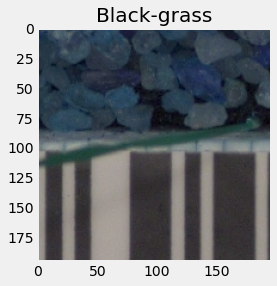

In [703]:
import matplotlib.image as image
index=0
#image_det=seedling_df.iloc[4748]['image_path']
#print(seedling_df.iloc[500]['image_path'])
#img = image.imread(image_det)
#img = seedling_df.iloc[0]['actual_img']
img=seedling_df.iloc[0]['actual_img']
plt.grid(False)
plt.title(seedling_df.iloc[0]['species_name'])
new=plt.imshow(np.squeeze(img))
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Write a function that will select n random images and display images along with its species. [4 Marks]


Hint: If input for function is 5, it should print 5 random images along with its labels.
2.

In [303]:
import matplotlib.image as matimage
import random

### Method to print n random images from the data set

#### This method accepts number of random images and print it by retrieving the images stored in the dataset

In [716]:
## Method to display random images
def display_random_images(no_of_images,data,title_name):## accept number of random images as input, data frame and name of title column
    randomlist = random.sample(range(0, data.shape[0]), no_of_images)
    print(randomlist)
    w = 10
    h = 10
    fig = plt.figure(figsize=(15, 15))
    
    columns = 3
    ## Logic to find the number of grids to represent
    num_rows=no_of_images//columns # Quotient will be stored in num_rows
    reminder=no_of_images%columns  # Reminder will be stored in Reminder
    
    if(reminder==0):
        rows=num_rows
    else:
        rows=num_rows+1
    #rows =2
    x=0
    for i in randomlist:
        x=x+1
        fig.add_subplot(rows, columns, x)
        fig.add_subplot(rows, columns, x)
        species_name=data.iloc[i][title_name]
        plt.title(species_name)
        img=seedling_df.iloc[i]['actual_img']
        plt.grid(False)
        new=plt.imshow(np.squeeze(img))
    plt.show()

### Method invocation by specifying the number of images as 5

[3566, 2019, 2370, 729, 378]


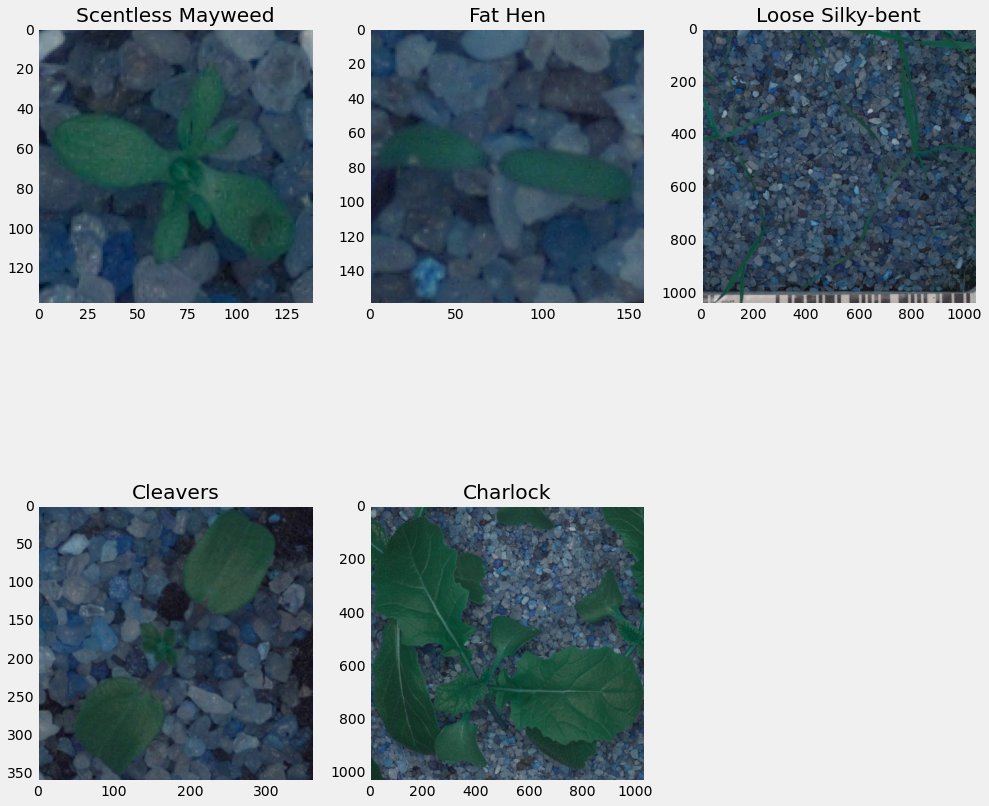

In [717]:
display_random_images(5,seedling_df,'species_name')

### 2.Data preprocessing [8 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> A. Create X & Y from the DataFrame. [2 Marks]

In [718]:
seedling_df.head()

actual_img  \
0  [[[[27 50 80], [18 42 71], [36 57 83], [45 66 89], [50 71 92], [ 61  81 100], [ 68  88 106], [ 6...   
1  [[[[37 43 55], [37 43 54], [40 46 57], [41 47 58], [48 53 64], [46 52 63], [47 52 64], [48 53 66...   
2  [[[[24 32 45], [21 30 44], [22 30 45], [24 31 46], [29 35 49], [25 32 44], [21 31 40], [24 34 42...   
3  [[[[ 51  84 108], [ 56  89 112], [ 54  88 110], [ 55  89 111], [ 55  89 112], [ 55  90 113], [ 5...   
4  [[[[165 162 162], [165 161 163], [160 157 158], [163 160 160], [162 161 159], [163 162 159], [16...   

      image_name  \
0  0050f38b3.png   
1  0183fdf68.png   
2  0260cffa8.png   
3  05eedce4d.png   
4  075d004bc.png   

                                                                image_path  \
0  unzipped/plant-seedlings-classification/train/Black-grass/0050f38b3.png   
1  unzipped/plant-seedlings-classification/train/Black-grass/0183fdf68.png   
2  unzipped/plant-seedlings-classification/train/Black-grass/0260cffa8.png   
3  unzipped/plant-seedlings-classification/train/Black-grass/05eedce4d.png   
4  unzipped/plant-seedlings-classification/train/Black-grass/075d004bc.png   

  species_name  
0  Black-grass  
1  Black-grass  
2  Black-grass  
3  Black-grass  
4  Black-grass

In [742]:
X=seedling_df.drop(labels= ["species_name"] , axis = 1)

In [743]:
X.head()

actual_img  \
0  [[[[27 50 80], [18 42 71], [36 57 83], [45 66 89], [50 71 92], [ 61  81 100], [ 68  88 106], [ 6...   
1  [[[[37 43 55], [37 43 54], [40 46 57], [41 47 58], [48 53 64], [46 52 63], [47 52 64], [48 53 66...   
2  [[[[24 32 45], [21 30 44], [22 30 45], [24 31 46], [29 35 49], [25 32 44], [21 31 40], [24 34 42...   
3  [[[[ 51  84 108], [ 56  89 112], [ 54  88 110], [ 55  89 111], [ 55  89 112], [ 55  90 113], [ 5...   
4  [[[[165 162 162], [165 161 163], [160 157 158], [163 160 160], [162 161 159], [163 162 159], [16...   

      image_name  \
0  0050f38b3.png   
1  0183fdf68.png   
2  0260cffa8.png   
3  05eedce4d.png   
4  075d004bc.png   

                                                                image_path  
0  unzipped/plant-seedlings-classification/train/Black-grass/0050f38b3.png  
1  unzipped/plant-seedlings-classification/train/Black-grass/0183fdf68.png  
2  unzipped/plant-seedlings-classification/train/Black-grass/0260cffa8.png  
3  unzipped/plant-seedlings-classification/train/Black-grass/05eedce4d.png  
4  unzipped/plant-seedlings-classification/train/Black-grass/075d004bc.png

In [721]:
y=seedling_df['species_name']

In [722]:
y.head()

0    Black-grass
1    Black-grass
2    Black-grass
3    Black-grass
4    Black-grass
Name: species_name, dtype: object


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Encode labels of the images. [2 Marks]

In [723]:
## Encoding the labels with the labelEncoder

In [724]:
encoder= LabelEncoder()
y=encoder.fit_transform(y)

In [725]:
y

array([ 0,  0,  0, ..., 11, 11, 11])

In [726]:
encoder.inverse_transform([11])

array(['Sugar beet'], dtype=object)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> C. Unify shape of all the images. [2 Marks]

In [351]:
NUM_CLASSES=len(classes)
NUM_CLASSES

12

In [739]:
HEIGHT=128
WIDTH=128
CHANNELS=3
input_shape=(WIDTH, HEIGHT, DEPTH)

In [745]:
X.shape

(4750, 3)

### Method to Unify the image shapes

In [760]:
def unify_image_shape(data):
    
    X = []
   # Loop through the dataframe to get all image path 
    for i in data.index:
        imagepath =data.iloc[i]['image_path']
        if(i==0):
            print(imagepath)
        img = load_img(imagepath)
        arr = img_to_array(img)  # Numpy array with shape (233,233,3)
        arr = cv2.resize(arr, (HEIGHT,WIDTH)) #Numpy array with shape (HEIGHT, WIDTH,3)
        X.append(arr)
    return X
      

In [761]:
X=unify_image_shape(seedling_df)

unzipped/plant-seedlings-classification/train/Black-grass/0050f38b3.png




<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> D. Normalise all the images. [2 Marks]

In [763]:
X[0]

array([[[ 77.51807 ,  47.181885,  23.59668 ],
        [ 81.575195,  54.592285,  33.248535],
        [ 88.85132 ,  66.33325 ,  45.246094],
        ...,
        [ 88.18091 ,  78.25903 ,  55.638184],
        [ 93.99878 ,  86.031494,  60.007324],
        [ 89.57715 ,  82.78027 ,  52.092285]],

       [[ 78.69751 ,  46.112305,  21.431885],
        [ 85.65747 ,  57.006836,  36.235596],
        [ 90.18872 ,  65.856445,  45.848145],
        ...,
        [ 87.93652 ,  76.74487 ,  59.463623],
        [ 91.796875,  81.04126 ,  62.025635],
        [ 88.947266,  77.55664 ,  57.29663 ]],

       [[ 82.56909 ,  49.10034 ,  24.694092],
        [ 84.1958  ,  53.528076,  31.188477],
        [ 94.71338 ,  69.385254,  50.605713],
        ...,
        [ 84.0105  ,  72.0105  ,  57.44629 ],
        [ 84.75    ,  72.488525,  57.613525],
        [ 89.02881 ,  76.78784 ,  61.356934]],

       ...,

       [[142.64722 , 148.82568 , 155.56006 ],
        [143.73755 , 149.87402 , 155.87402 ],
        [142.698   , 1

In [764]:
X= np.array(X, dtype="float") / 255.0


In [766]:
X[0]

array([[[0.30399242, 0.185027  , 0.092536  ],
        [0.31990273, 0.21408739, 0.13038641],
        [0.34843654, 0.2601304 , 0.17743566],
        ...,
        [0.34580748, 0.30689817, 0.21818896],
        [0.36862266, 0.33737841, 0.23532284],
        [0.35128294, 0.32462852, 0.20428347]],

       [[0.30861769, 0.18083257, 0.08404661],
        [0.33591165, 0.22355622, 0.14210038],
        [0.35368126, 0.25826057, 0.17979665],
        ...,
        [0.34484911, 0.30096029, 0.23319068],
        [0.35998775, 0.31780886, 0.24323778],
        [0.34881281, 0.30414369, 0.22469267]],

       [[0.32380036, 0.19255036, 0.09683958],
        [0.33017961, 0.20991402, 0.12230775],
        [0.37142502, 0.27209903, 0.19845378],
        ...,
        [0.32945293, 0.28239411, 0.22527956],
        [0.33235294, 0.28426873, 0.22593539],
        [0.34913258, 0.30112879, 0.24061543]],

       ...,

       [[0.55940085, 0.58363013, 0.61003945],
        [0.56367666, 0.58774127, 0.61127068],
        [0.55959999, 0

#### Comments:
Through Normalize all the images are normalized now ready for model building

## 3. Model Training [10 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A.Split the data into train and test data. [2 Marks]

In [369]:
from sklearn.model_selection import train_test_split

In [773]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Create new CNN architecture to train the model. [4 Marks]

In [767]:
## method to define CNN model .It accepts height width, num_channels and num classes as parameter

In [372]:
def build_cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (height, width, num_channels))) 
    model.add(MaxPooling2D(pool_size=3))
    #model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    #model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten()) 
    # fully connected layer 
    model.add(Dense(units = 500, activation = 'relu')) 
    model.add(Dropout(0.2))
    # output layer
    model.add(Dense(units = num_classes, activation = 'softmax')) 
    model.summary()
    return model

In [768]:
HEIGHT=128
WIDTH=128
CHANNELS=3

In [ ]:
## Building CNN model

In [769]:
cnn_seedling_model = build_cnn_model(HEIGHT, WIDTH, CHANNELS,NUM_CLASSES)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 41, 41, 64)        32832     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 10, 10, 128)     

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Train the model on train data and validate on test data. [2 Marks]

In [374]:
## Compile the model

In [770]:
cnn_seedling_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [386]:
### Train the model

In [774]:
print('Train data shape')
print('---------------')
print(X_train.shape)
print(y_train.shape)
print('Test data shape')
print('---------------')
print(X_test.shape)
print(y_test.shape)

Train data shape
---------------
(3325, 128, 128, 3)
(3325,)
Test data shape
---------------
(1425, 128, 128, 3)
(1425,)


In [775]:
print('y_test unique classes', np.unique(y_test))

y_test unique classes [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [776]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [380]:
def fit_model(model,X_train,y_train,X_val,y_val,epochs,batch_size):
    history = model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val, y_val))
    return history

In [777]:
epochs=25
batchsize=100

In [778]:
cnn_seed_history = cnn_seedling_model.fit(X_train, y_train,epochs=epochs,batch_size=100,validation_data=(X_test, y_test))

Epoch 1/25
34/34 [==============================] - 108s 3s/step - loss: 2.3966 - accuracy: 0.1600 - val_loss: 2.1957 - val_accuracy: 0.2632
Epoch 2/25
34/34 [==============================] - 93s 3s/step - loss: 1.9051 - accuracy: 0.3489 - val_loss: 1.5968 - val_accuracy: 0.4554
Epoch 3/25
34/34 [==============================] - 91s 3s/step - loss: 1.6084 - accuracy: 0.4283 - val_loss: 1.4270 - val_accuracy: 0.5004
Epoch 4/25
34/34 [==============================] - 93s 3s/step - loss: 1.3767 - accuracy: 0.5095 - val_loss: 1.2112 - val_accuracy: 0.5846
Epoch 5/25
34/34 [==============================] - 93s 3s/step - loss: 1.1934 - accuracy: 0.5817 - val_loss: 1.0341 - val_accuracy: 0.6281
Epoch 6/25
34/34 [==============================] - 93s 3s/step - loss: 1.0099 - accuracy: 0.6457 - val_loss: 0.9274 - val_accuracy: 0.6933
Epoch 7/25
34/34 [==============================] - 96s 3s/step - loss: 0.8956 - accuracy: 0.6911 - val_loss: 0.9418 - val_accuracy: 0.6611
Epoch 8/25
34/34 [=

In [190]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [779]:
def plot_accuracy_loss(history):
    accuracy      = history.history['accuracy']
    val_accuracy  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(accuracy)) # Get number of epochs

    plt.plot  ( epochs, accuracy, label = 'training accuracy' )
    plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
    plt.title ('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc = 'lower right')
    plt.figure()

    plt.plot  ( epochs, loss, label = 'training loss' )
    plt.plot  ( epochs, val_loss, label = 'validation loss' )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc = 'upper right')
    plt.title ('Training and validation loss')
    

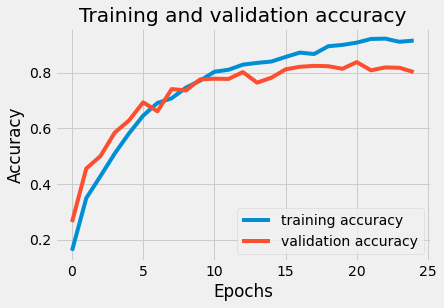

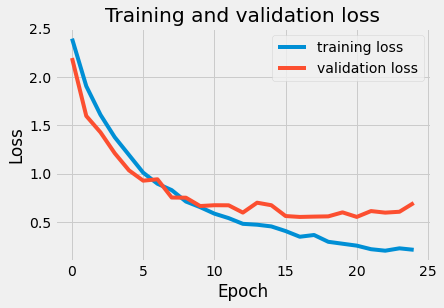

In [780]:
plot_accuracy_loss(cnn_seed_history)


#### Comments:
The graph shows good accuracy improves the training and test accuracy. The training is done for 25 epochs the training accuracy reached almost 91.55%
Where as test accuracy reached 80%

In [782]:
# Final evaluation of the model
def evaluate_model(model,X_test,y_test):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Loss:", scores[0])
    print("Accuracy:", scores[1])

In [783]:
## Test Loss and Test Accuracy Details

In [781]:
evaluate_model(cnn_seedling_model,X_test,y_test)

Loss: 0.6964271664619446
Accuracy: 0.8021052479743958


In [784]:
 scores = cnn_seedling_model.evaluate(X_test, y_test, verbose=0)

In [786]:
scores

[0.6964271664619446, 0.8021052479743958]

In [787]:
## Test and Training accuracy of the model

In [788]:
cnn_train_acc=cnn_seed_history.history['accuracy'][-1]
cnn_test_acc=cnn_seed_history.history['val_accuracy'][-1]
cnn_train_loss=cnn_seed_history.history['loss'][-1]
cnn_test_loss=cnn_seed_history.history['val_loss'][-1]

In [789]:
print('Training accuracy',cnn_train_acc,'cnn_test_acc',cnn_test_acc,'train_loss',cnn_train_loss,'test_loss',cnn_test_loss)

Training accuracy 0.9154887199401855 cnn_test_acc 0.8021052479743958 train_loss 0.2122935801744461 test_loss 0.6964271664619446


In [790]:
#predict on test
y_predict = cnn_seedling_model.predict(X_test)

In [791]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [792]:
len(classes)

12

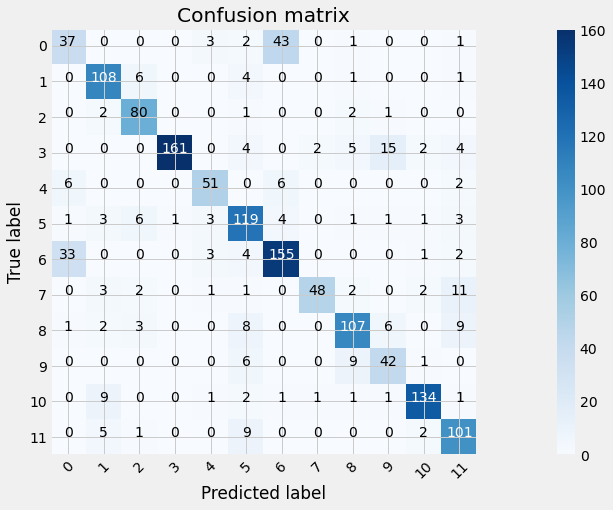

In [794]:

import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

# Predict the values from the validation dataset
#y_pred = cnn_model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_predict,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

#### Comments

As per the confusion matrix the model can predict well. Misclassification happens for class 6.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [654]:
seedling_df.shape

(4750, 3)

### Getting a Random Number and printing its image and corresponding label

In [642]:
import random
random_number = random. randint(0,seedling_df.shape[0])
print(random_number)

808


unzipped/plant-seedlings-classification/train/Cleavers/85b23f3e6.png


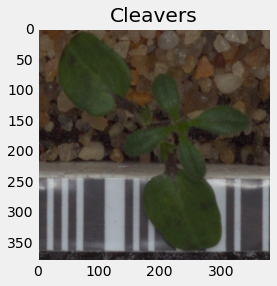

In [796]:

import matplotlib.image as image
image_det=seedling_df.iloc[random_number]['image_path']
print(seedling_df.iloc[random_number]['image_path'])
img = image.imread(image_det)
plt.grid(False)
plt.title(seedling_df.iloc[random_number]['species_name'])
new=plt.imshow(img)
plt.show()

### Method to predict the image

In [797]:
def predict_seedling_image(img, cnn_seedling_model):
  img_width=128
  img_height=128
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = cnn_seedling_model.predict(img)
  print(pred)
  class_num = np.argmax(pred)
  print(class_num)
  return class_num, np.max(pred)

### Loading the Same image for Prediction

In [798]:

import cv2
print(image_det)
input_image = cv2.imread(image_det)
input_image_height, input_image_width, input_image_channels = input_image.shape

unzipped/plant-seedlings-classification/train/Cleavers/85b23f3e6.png


In [799]:
input_image.shape

(382, 382, 3)

In [800]:
cnn_predict_class, cnn_pred_proba=predict_seedling_image(input_image,cnn_seedling_model)

[[7.2001555e-08 6.6989199e-03 9.8549485e-01 1.3310973e-08 2.4912137e-04
  7.5408649e-03 1.5265911e-08 2.8784050e-06 1.1044883e-06 1.7099243e-06
  3.0365015e-06 7.3305305e-06]]
2


In [801]:
cnn_predict_class

2

In [802]:
print("Predicted class by using the Built model is ",cnn_predict_class ,"with the probability of ",cnn_pred_proba )

Predicted class by using the Built model is  2 with the probability of  0.98549485


In [803]:
cnn_pred_proba

0.98549485

### Verifying the Predicted Label is as per the actual

In [804]:
encoder.inverse_transform([cnn_predict_class])

array(['Cleavers'], dtype=object)

### Conclusion:
    
   *  The built model can predict the cleaver seedling with **98.54%** probability.
   *  The overall test accuracy of the model is **80.00%** where as the Training accuracy is **91.55%**
   *  The accuracy and loss graph shows the little overfitting.
   *  The built model performs fairly well in training and testing data
   *  And this model able to predict the random image correctly with 98% probability.     

## PART B

**DOMAIN**: Botanical Research <br>
**CONTEXT**:University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s
species from a photo. <br>

• **DATA DESCRIPTION**: The dataset comprises of images from 17 plant species.

**• PROJECT OBJECTIVE:** :To experiment with various approaches to train an image classifier to predict type of flower from the image.

## Steps and tasks: [ Total Score: 30 Marks]
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1. Import and Understand the data [5 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A.Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]


In [5]:
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import collections
import seaborn as sns
import pandas as pd



from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

# Import label encoder
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dropout, InputLayer, BatchNormalization
from tensorflow.keras import layers

In [7]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [8]:
#Load the dataset and split into X and y
X, y = oxflower17.load_data()

**Comments:**<br>
    The data is loaded from oxflower data set and split into X and y successfully.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Print Number of images and shape of the images. [1 Marks ]

In [9]:
X.shape, y.shape

((1360, 224, 224, 3), (1360,))

In [811]:
print('Number of Images',X.shape[0])

Number of Images 1360


In [812]:
print('Shape of the Images',X.shape[1],X.shape[2],X.shape[3])

Shape of the Images 224 224 3


In [813]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Observation**<br>

*   Ther are 1360 images available in the dataset
*   And they are of shape 224 * 224
*   There are 3 channels (Red , Green and Blue)

In [815]:
## to have a look at first image
index=5
X[index]

array([[[0.12156863, 0.16078432, 0.02745098],
        [0.1254902 , 0.16470589, 0.03137255],
        [0.12941177, 0.16862746, 0.03529412],
        ...,
        [0.21568628, 0.2627451 , 0.03137255],
        [0.17254902, 0.20784314, 0.02352941],
        [0.14901961, 0.1764706 , 0.03529412]],

       [[0.13333334, 0.17254902, 0.04313726],
        [0.13333334, 0.16862746, 0.03921569],
        [0.13333334, 0.17254902, 0.04313726],
        ...,
        [0.1882353 , 0.23137255, 0.00392157],
        [0.16470589, 0.2       , 0.01960784],
        [0.15686275, 0.18431373, 0.04313726]],

       [[0.11764706, 0.15294118, 0.03137255],
        [0.12941177, 0.16470589, 0.04313726],
        [0.13333334, 0.16862746, 0.04705882],
        ...,
        [0.16470589, 0.20784314, 0.        ],
        [0.14901961, 0.1882353 , 0.01176471],
        [0.15294118, 0.1882353 , 0.02745098]],

       ...,

       [[0.0627451 , 0.09803922, 0.01176471],
        [0.05882353, 0.09803922, 0.00392157],
        [0.06666667, 0

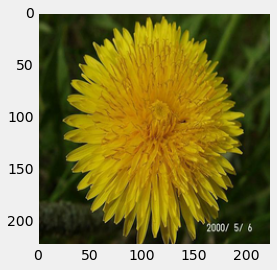

In [818]:
plt.grid(False)
img=plt.imshow(X[index])

Image shape of 224*224 is available

In [31]:
## To get the image label
print('The image label is',y[index])

The image label is 4


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> C. Print count of each class from y. [2 Marks]

#### Unique Class names

In [10]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

**Observation**
* The total number of classes are 17 ranging from 0 to 16

### Printing the individual count with collection object

In [23]:

collections.Counter(y)

Counter({4: 80,
         13: 80,
         9: 80,
         0: 80,
         3: 80,
         12: 80,
         8: 80,
         6: 80,
         10: 80,
         14: 80,
         1: 80,
         11: 80,
         7: 80,
         16: 80,
         15: 80,
         2: 80,
         5: 80})

### Printing the individual count with Numpy

In [819]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 80,
 1: 80,
 2: 80,
 3: 80,
 4: 80,
 5: 80,
 6: 80,
 7: 80,
 8: 80,
 9: 80,
 10: 80,
 11: 80,
 12: 80,
 13: 80,
 14: 80,
 15: 80,
 16: 80}

In [823]:
unique, counts = np.unique(y, return_counts=True)
class_dict=dict(zip(unique, counts))

In [824]:
class_dict

{0: 80,
 1: 80,
 2: 80,
 3: 80,
 4: 80,
 5: 80,
 6: 80,
 7: 80,
 8: 80,
 9: 80,
 10: 80,
 11: 80,
 12: 80,
 13: 80,
 14: 80,
 15: 80,
 16: 80}

In [829]:
# Print the names of the columns.
print ("{:<10} {:<10}".format('Class Name', 'Count'))
 
# print each data item.
for key, value in class_dict.items():
     print ("{:<10} {:<10}".format(key, value))

Class Name Count     
0          80        
1          80        
2          80        
3          80        
4          80        
5          80        
6          80        
7          80        
8          80        
9          80        
10         80        
11         80        
12         80        
13         80        
14         80        
15         80        
16         80        


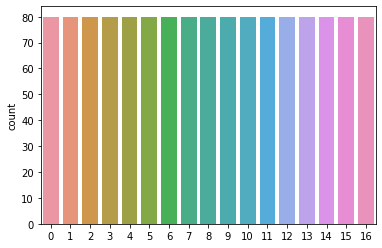

In [28]:
#plotting the graph  
sns.countplot(y)  
plt.show()

#### Comments:<br>

The individual class count is printed and also count plot is shown to display the counts. Every class from 0 to 16 has count of 80.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

Text(0.5, 1.0, 'Displaying a random image')

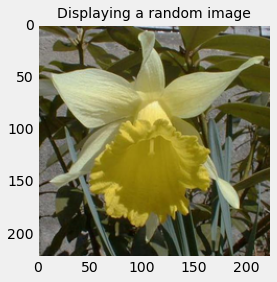

In [831]:
plt.imshow(X[50])
plt.grid(False)

plt.title("Displaying a random image", fontsize=14)

In [832]:
import random
n = random.randint(0,1360)
print(n)

1223


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Display 5 random images. [1 Marks]

In [834]:
## method to display 5 random images

In [871]:
def display_random_images(no_of_images):
    randomlist = random.sample(range(0, 1360), no_of_images)
    print(randomlist)
    w = 10
    h = 10
    fig = plt.figure(figsize=(15, 15))
    
    columns = 3
    ## Logic to find the number of grids to represent
    num_rows=no_of_images//columns # Quotient will be stored in num_rows
    reminder=no_of_images%columns  # Reminder will be stored in Reminder
    
    if(reminder==0):
        rows=num_rows
    else:
        rows=num_rows+1
        
    x=0
   
    for i in randomlist:
        x=x+1
        fig.add_subplot(rows, columns, x)
        plt.title('image at postion '+str(i) +' label '+str(y[i]))
        plt.grid(False)
        plt.imshow(X[i])
    plt.show()

In [864]:
##Invoking the Display method to display 5 images

[851, 1155, 134, 1219, 627]


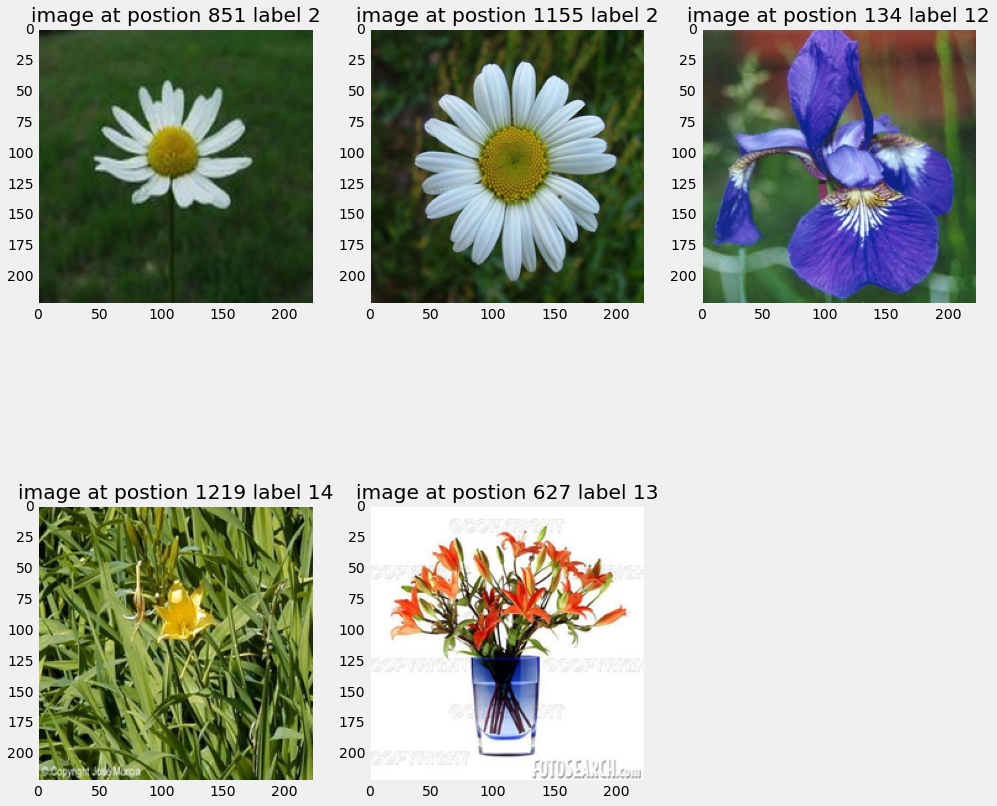

In [869]:
display_random_images(5)

**Comments**<br>
The 5 random images are displayed .

### For better understanding the data viewing more images

[694, 1176, 390, 1070, 1155, 669, 97, 1346, 1184]


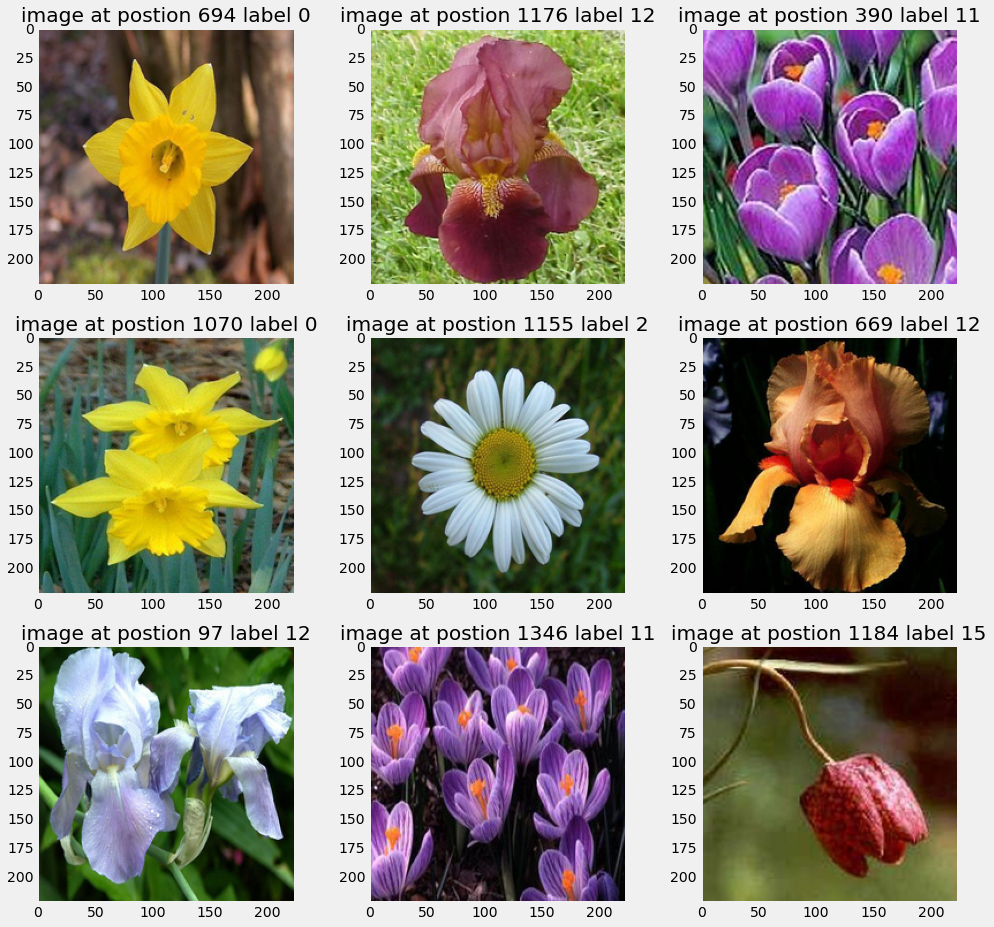

In [874]:
display_random_images(9)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> B. Select any image from the dataset and assign it to a variable. [1 Marks]

In [876]:
sample_img = X[118]

**Comments**<br>
An image is stored in a variable

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Transform the image into grayscale format and display the same. [3 Marks]

In [878]:
plt.style.use('default')

Text(0.5, 1.0, 'Sample image')

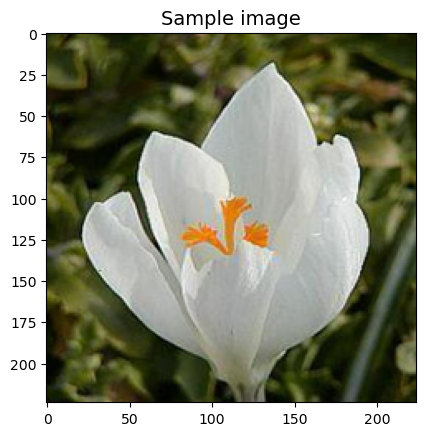

In [879]:
plt.imshow(sample_img)
#plt.grid('False')
plt.title("Sample image", fontsize=14)

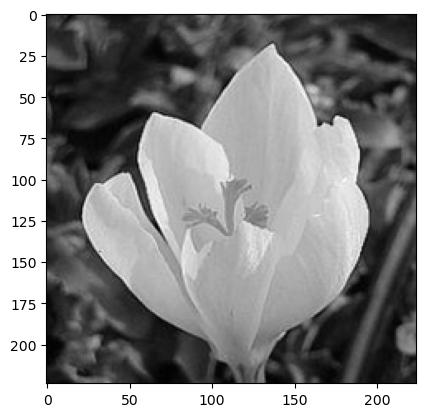

In [881]:
##Method to convert Gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

  
gray = rgb2gray(sample_img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#plt.grid(False)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

In [897]:
### Before Sharpening

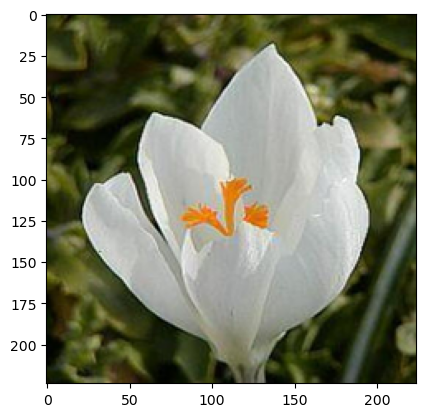

In [898]:
plt.imshow(sample_img)
#plt.grid(False)
plt.show()

In [ ]:
##Method to Sharpen the image by applying filter

In [899]:
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpened = cv2.filter2D(sample_img, -1, kernel) # applying the sharpening kernel to the input image & displaying it.
cv2.imshow('Image Sharpening', sharpened)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


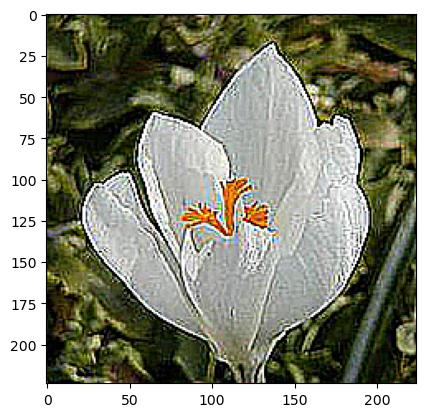

In [900]:
plt.imshow(sharpened, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.grid(False)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">E. Apply a filter to blur the image and display the image before and after blur. [2 Mark]

In [887]:
image_blurred = cv2.blur(src=sample_img, ksize=(5, 5))
cv2.imshow('Blurred Image', image_blurred)

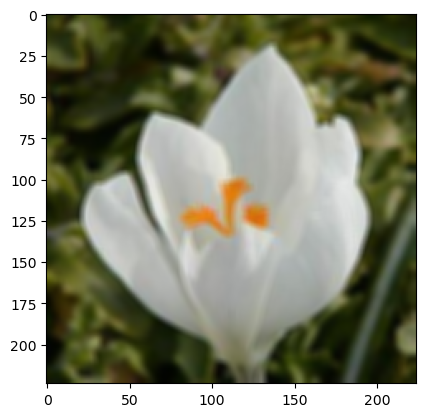

In [888]:
#plt.grid(False)
plt.imshow(image_blurred)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks

In [893]:
# Loop Over Two Lists to Create a Dictionary
keys = ['Original Image', 'Grayed Image', 'Sharpened Image','Blurred Image']
image_list=[sample_img,gray,sharpened,image_blurred]
#values = [32, 31, 30]
dictionary = {}
for i in range(len(keys)):
    dictionary[keys[i]] = image_list[i]
#print(dictionary)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


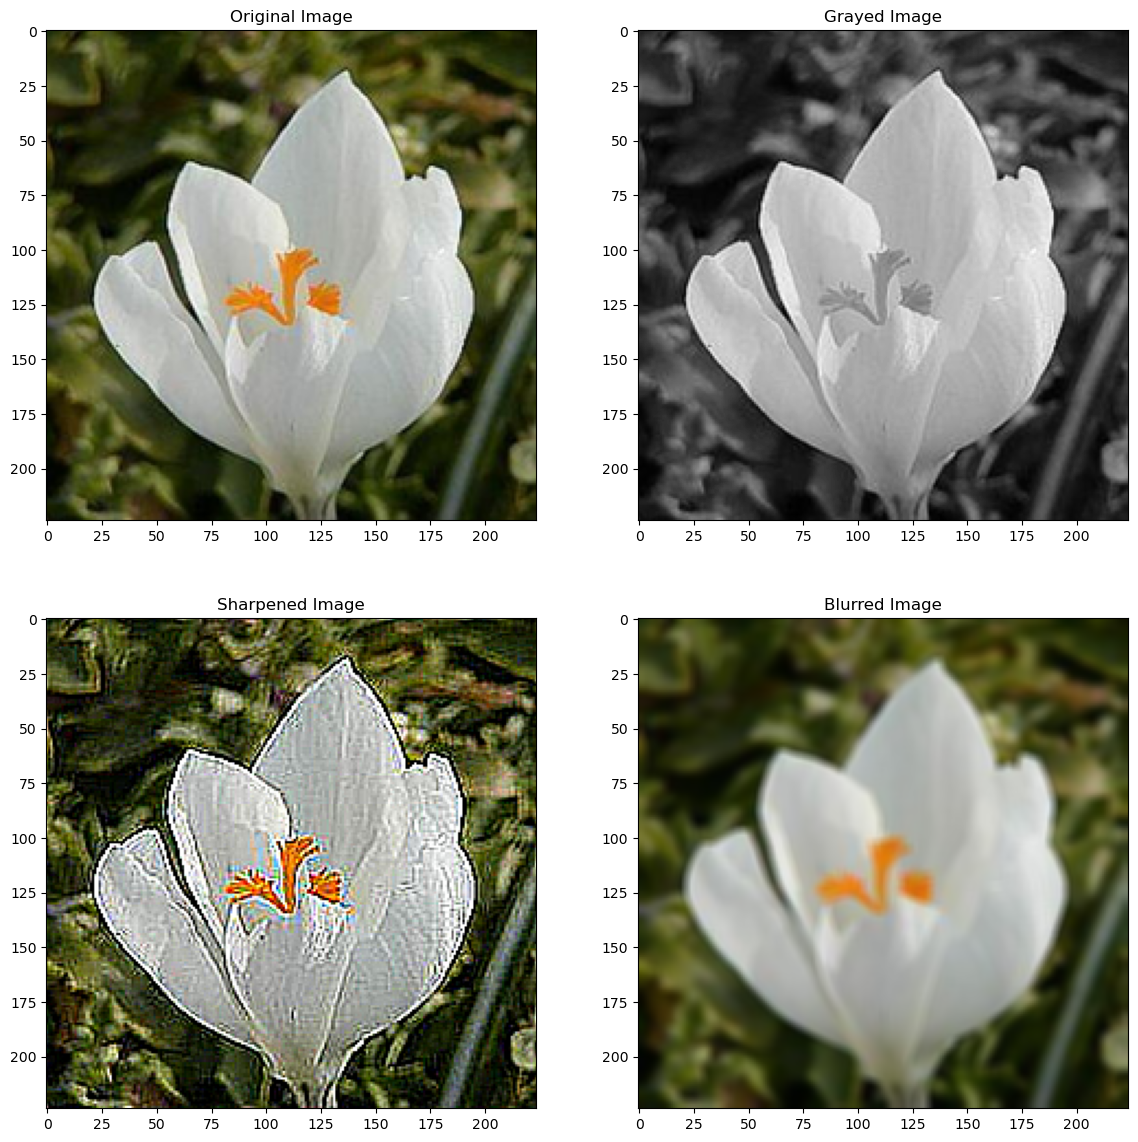

In [895]:
x=0
rows=2
columns=2
w = 10
h = 10
fig = plt.figure(figsize=(14, 14))
for key in dictionary:
    #img = np.random.randint(10, size=(h,w))
    x=x+1
    fig.add_subplot(rows, columns, x)
    plt.title(key)
    plt.grid(False)
    if(key=='Grayed Image'):
         #plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
         plt.imshow(dictionary[key],cmap=plt.get_cmap('gray'),)
    else:
        plt.imshow(dictionary[key])
#plt.show()

**Observation:**
  * Through graying RGB values are modified and can see the graueffect
  * Sharpening allows to have the contour or outine of images more prominent
  * Blurred image makes the surface smooth making the outlines merge with others so will get blend look

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Model training and Tuning: [15 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> A. Split the data into train and test with 80:20 proportion. [2 Marks]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
print('Train data shape')
print('---------------')
print(X_train.shape)
print(y_train.shape)
print('Test data shape')
print('---------------')
print(X_test.shape)
print(y_test.shape)

Train data shape
---------------
(1088, 224, 224, 3)
(1088,)
Test data shape
---------------
(272, 224, 224, 3)
(272,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3.Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

#### Supervised learning models will need 2 Dimension

In [14]:
X_train[0]

array([[[0.21960784, 0.34901962, 0.16862746],
        [0.21176471, 0.3372549 , 0.15686275],
        [0.19607843, 0.3137255 , 0.11372549],
        ...,
        [0.0627451 , 0.16078432, 0.01176471],
        [0.10980392, 0.2       , 0.0627451 ],
        [0.18039216, 0.2627451 , 0.13725491]],

       [[0.24705882, 0.37254903, 0.20392157],
        [0.23137255, 0.34901962, 0.18039216],
        [0.21176471, 0.32156864, 0.13725491],
        ...,
        [0.08235294, 0.18431373, 0.03529412],
        [0.13333334, 0.23529412, 0.09411765],
        [0.21568628, 0.3137255 , 0.18039216]],

       [[0.27058825, 0.3764706 , 0.22745098],
        [0.23137255, 0.34117648, 0.1882353 ],
        [0.2       , 0.30588236, 0.13725491],
        ...,
        [0.09019608, 0.2       , 0.05490196],
        [0.16078432, 0.26666668, 0.12941177],
        [0.21176471, 0.32156864, 0.1882353 ]],

       ...,

       [[0.30588236, 0.38039216, 0.27450982],
        [0.24705882, 0.31764707, 0.21960784],
        [0.22352941, 0

#### data is already normalized hence reshaping for Supervised model

In [15]:
nsamples, nx, ny, channels= X_train.shape
print(nsamples,nx,ny,channels)


1088 224 224 3


In [16]:
Dim_2_X_train = X_train.reshape((nsamples,nx*ny*channels))

In [17]:
Dim_2_X_test = X_test.reshape(X_test.shape[0],nx*ny*channels)

#### Logistic Regression for Classification

In [18]:
seed=0
from sklearn.linear_model import LogisticRegression
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(Dim_2_X_train, y_train)


[INFO] creating model...


LogisticRegression(random_state=0)

In [19]:
#predict on test
y_predict = model.predict(Dim_2_X_test)

In [20]:
model_score_train= model.score(Dim_2_X_train, y_train)
print(model_score_train)

1.0


In [21]:
model_score = model.score(Dim_2_X_test, y_test)
print(model_score)

0.5110294117647058


In [22]:
## Display the confusion matrix

[INFO] confusion matrix


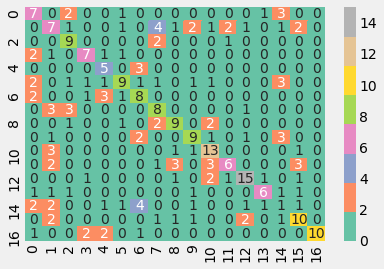

In [23]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
#labels = unique
# plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

#### Classification report for Logistic Regression

In [24]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.30      0.32      0.31        22
           2       0.75      0.50      0.60        18
           3       0.58      0.58      0.58        12
           4       0.62      0.38      0.48        13
           5       0.43      0.60      0.50        15
           6       0.53      0.42      0.47        19
           7       0.53      0.42      0.47        19
           8       0.60      0.56      0.58        16
           9       0.53      0.56      0.55        16
          10       0.68      0.57      0.62        23
          11       0.33      0.60      0.43        10
          12       0.68      0.71      0.70        21
          13       0.50      0.67      0.57         9
          14       0.07      0.08      0.07        13
          15       0.56      0.53      0.54        19
          16       0.62      1.00      0.77        10

    accuracy              

In [25]:
model_performance_flower_cl=pd.DataFrame(columns=['Model', 'Accuracy', 'Test Accuracy','Loss','Test Loss'])


In [26]:
model_performance_flower_cl=model_performance_flower_cl.append({'Model':'Logistic Regression',
                                              'Accuracy': model_score_train,
                                              'Test Accuracy':model_score,
                                              'Loss': 'NA',
                                              'Test Loss':'NA'                              
                                              }, ignore_index=True)


In [27]:
model_performance_flower_cl

Model  Accuracy  Test Accuracy Loss Test Loss
0  Logistic Regression       1.0       0.511029   NA        NA

### KNeighor classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Model after scaling the features without hyperparameter tuning
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Dim_2_X_train,y_train)

print('k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(knn.score(Dim_2_X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(knn.score(Dim_2_X_test, y_test)))

y_true, y_pred = y_test, knn.predict(Dim_2_X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))


k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning


k-NN accuracy for train set: 0.554
k-NN accuracy for test set: 0.320

              precision    recall  f1-score   support

           0       0.26      0.36      0.30        14
           1       0.00      0.00      0.00        23
           2       0.57      0.67      0.62        12
           3       0.33      0.08      0.13        12
           4       0.28      0.88      0.42         8
           5       0.10      0.19      0.13        21
           6       0.26      0.40      0.32        15
           7       0.75      0.40      0.52        15
           8       0.50      0.20      0.29        15
           9       0.24      0.41      0.30        17
          10       0.41      0.37      0.39        19
          11       0.00      0.00      0.00        18
          12       0.77      0.77      0.77        22
          13       0.50      0.08      0.14        12
          14       0.12      0.20   

In [29]:
train_score=knn.score(Dim_2_X_train, y_train)
train_score

0.5542279411764706

[INFO] confusion matrix for KNN model


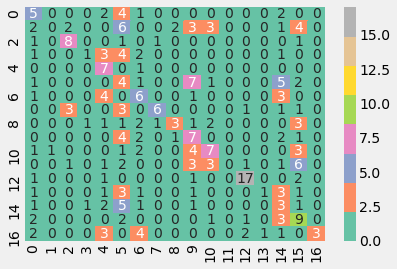

In [30]:
# display the confusion matrix 
print ("[INFO] confusion matrix for KNN model")

# get the list of training lables
#labels = unique
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [31]:
model_performance_flower_cl=model_performance_flower_cl.append({'Model':'KNeighborsClassifier',
                                              'Accuracy': train_score,
                                              'Test Accuracy':auc.round(3),
                                              'Loss': 'NA',
                                              'Test Loss':'NA'                              
                                              }, ignore_index=True)

In [32]:
model_performance_flower_cl

Model  Accuracy  Test Accuracy Loss Test Loss
0   Logistic Regression  1.000000       0.511029   NA        NA
1  KNeighborsClassifier  0.554228       0.320000   NA        NA

### Build SVM model

In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Dim_2_X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(Dim_2_X_test)


In [34]:
## metrics

In [35]:
model_score = clf.score(Dim_2_X_test, y_test)
print(model_score)

0.47058823529411764


In [36]:
model_train_score = clf.score(Dim_2_X_train, y_train)
print(model_train_score)

1.0


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.26      0.26      0.26        23
           2       0.75      0.47      0.58        19
           3       0.58      0.58      0.58        12
           4       0.62      0.42      0.50        12
           5       0.33      0.35      0.34        20
           6       0.33      0.42      0.37        12
           7       0.47      0.44      0.45        16
           8       0.60      0.53      0.56        17
           9       0.47      0.57      0.52        14
          10       0.63      0.55      0.59        22
          11       0.33      0.55      0.41        11
          12       0.73      0.80      0.76        20
          13       0.33      0.36      0.35        11
          14       0.20      0.12      0.15        24
          15       0.44      0.44      0.44        18
          16       0.56      1.00      0.72         9

    accuracy              

[INFO] confusion matrix for SVM model


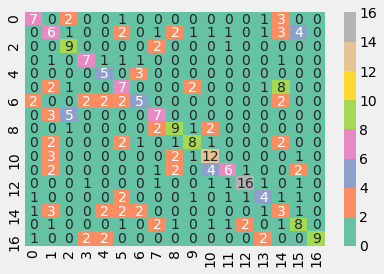

In [38]:
# display the confusion matrix 
print ("[INFO] confusion matrix for SVM model")

# get the list of training lables
#labels = unique
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [39]:
model_performance_flower_cl=model_performance_flower_cl.append({'Model':'Support Vector Classifier',
                                              'Accuracy': model_train_score,
                                              'Test Accuracy':model_score,
                                              'Loss': 'NA',
                                              'Test Loss':'NA'                              
                                              }, ignore_index=True)

In [40]:
model_performance_flower_cl

Model  Accuracy  Test Accuracy Loss Test Loss
0        Logistic Regression  1.000000       0.511029   NA        NA
1       KNeighborsClassifier  0.554228       0.320000   NA        NA
2  Support Vector Classifier  1.000000       0.470588   NA        NA

**Comments and Observation**:
  * Among 3 supervised models tried Logistic Regression gave better accuracy of **51.10%**. Other models have less than 50% accuracy.
  * Suprisingly Logistic regression and support vector classifiers gave 100% accuracy on train data. And lead to overfitting

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

#### Reshape train and test sets into compatible shapes
* Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)

* n_e= number of examples, n_h = height, n_w = width, n_c = number of channels

* do not reshape labels [the following will be used for Neural network models

### Image Classification

In [41]:
print('Train data shape')
print('---------------')
print(X_train.shape)
print(y_train.shape)
print('Test data shape')
print('---------------')
print(X_test.shape)
print(y_test.shape)

Train data shape
---------------
(1088, 224, 224, 3)
(1088,)
Test data shape
---------------
(272, 224, 224, 3)
(272,)


In [42]:
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Convert the labels into set of 16 classes to feed to Neural Network

In [43]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [44]:
print('y_train Shape', y_train.shape)
#print('y_val Shape', y_val.shape)
print('y_test Shape',y_test.shape)

y_train Shape (1088,)
y_test Shape (272,)


In [45]:
print('y_train Shape', y_train_one_hot.shape)
#print('y_val Shape', y_val.shape)
print('y_test Shape',y_test_one_hot.shape)

y_train Shape (1088, 17)
y_test Shape (272, 17)


In [46]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is', y_train_one_hot[index])

In [48]:
X_train.max()

1.0

In [49]:
X_train.min()

0.0

#### As pixels values are already normalized no normalization required

### Create Neural Network Model

In [51]:
output_classes=len(np.unique(y_train))

In [52]:
output_classes

17

### Define a method to create ANN model

In [53]:
def create_ann_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  # batch_size = None

  model = Sequential()

  model.add(InputLayer(input_shape=(height, width, num_channels)))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(num_classes, activation = "softmax"))
  opt = tf.keras.optimizers.Adam(lr=0.000001)
  model.compile(optimizer = opt, loss = loss, metrics = metrics)

  model.summary()
  return model

In [54]:
height, width, num_channels=X_train.shape[1:]

In [57]:
ann_model = create_ann_model(height, width, num_channels,output_classes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 150528)           602112    
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1024)              154141696 
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 512)              

In [58]:
# Create optimizer with default learning rate
# Compile the model
## Categorical cross_entrophy is used as multiclass classificaton problem
ann_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [59]:
history = ann_model.fit(X_train, 
                  y_train_one_hot, 
                  epochs = 50, 
                  validation_data = (X_test,y_test_one_hot),
                  batch_size = 100)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 13s 12ms/sample - loss: 2.8034 - acc: 0.2059 - val_loss: 10.1195 - val_acc: 0.1103
Epoch 2/50
1088/1088 [==============================] - 19s 17ms/sample - loss: 2.0298 - acc: 0.3548 - val_loss: 5.6260 - val_acc: 0.1250
Epoch 3/50
1088/1088 [==============================] - 21s 19ms/sample - loss: 1.8022 - acc: 0.4108 - val_loss: 3.2728 - val_acc: 0.1544
Epoch 4/50
1088/1088 [==============================] - 18s 17ms/sample - loss: 1.5742 - acc: 0.4835 - val_loss: 2.8230 - val_acc: 0.1912
Epoch 5/50
1088/1088 [==============================] - 18s 16ms/sample - loss: 1.3657 - acc: 0.5395 - val_loss: 2.5222 - val_acc: 0.2169
Epoch 6/50
1088/1088 [==============================] - 16s 14ms/sample - loss: 1.1916 - acc: 0.6057 - val_loss: 2.3745 - val_acc: 0.2279
Epoch 7/50
1088/1088 [==============================] - 15s 14ms/sample - loss: 1.0074 - acc: 0.6792 - val_loss: 2.1511 - va

In [60]:
def plot_accuracy_loss(history):
    accuracy      = history.history['acc']
    val_accuracy  = history.history['val_acc']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(accuracy)) # Get number of epochs

    plt.plot  ( epochs, accuracy, label = 'training accuracy' )
    plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
    plt.title ('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc = 'lower right')
    plt.figure()

    plt.plot  ( epochs, loss, label = 'training loss' )
    plt.plot  ( epochs, val_loss, label = 'validation loss' )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc = 'upper right')
    plt.title ('Training and validation loss')

In [61]:
# Final evaluation of the model
def evaluate_model(model,X_test,y_test):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Loss:", scores[0])
    print("Accuracy:", scores[1])

In [62]:
evaluate_model(ann_model,X_test,y_test_one_hot)

Loss: 1.9457851578207577
Accuracy: 0.50735295


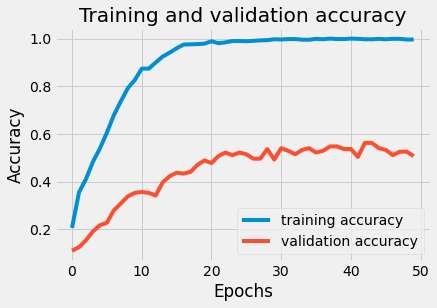

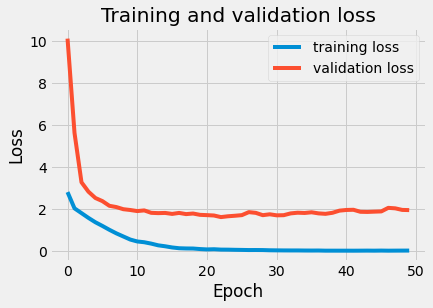

In [63]:
plot_accuracy_loss(history)

In [64]:
ann_train_acc=history.history['acc'][-1]
ann_test_acc=history.history['val_acc'][-1]
ann_train_loss=history.history['loss'][-1]
ann_test_loss=history.history['val_loss'][-1]

In [65]:
print('Training accuracy',ann_train_acc,'ann_test_acc',ann_test_acc,'train_loss',ann_train_loss,'test_loss',ann_test_loss)

Training accuracy 0.9963235259056091 ann_test_acc 0.5073529481887817 train_loss 0.016763041751212713 test_loss 1.9457850947099573


In [66]:
model_performance_flower_cl=model_performance_flower_cl.append({'Model':'Neural Network',
                                              'Accuracy': ann_train_acc,
                                              'Test Accuracy':ann_test_acc ,
                                              'Loss': ann_train_loss,
                                              'Test Loss':ann_test_loss                              
                                              }, ignore_index=True)

In [67]:
model_performance_flower_cl

Model  Accuracy  Test Accuracy      Loss Test Loss
0        Logistic Regression  1.000000       0.511029        NA        NA
1       KNeighborsClassifier  0.554228       0.320000        NA        NA
2  Support Vector Classifier  1.000000       0.470588        NA        NA
3             Neural Network  0.996324       0.507353  0.016763  1.945785

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

In [68]:
def build_cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (height, width, num_channels))) 
    model.add(MaxPooling2D(pool_size=3))
    #model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    #model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten()) 
    # fully connected layer 
    model.add(Dense(units = 500, activation = 'relu')) 
    model.add(Dropout(0.2))
    # output layer
    model.add(Dense(units = num_classes, activation = 'softmax')) 
    model.summary()
    return model

In [69]:
cnn_model = build_cnn_model(height, width, num_channels,output_classes)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)     

In [70]:
## compile the model

In [71]:
cnn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [72]:
def fit_model(model,X_train,y_train,X_val,y_val,epochs,batch_size):
    history = model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val, y_val))
    return history

In [73]:
epochs=50
batchsize=100

In [74]:
cnn_history=fit_model(cnn_model,X_train,y_train_one_hot,X_test, y_test_one_hot,epochs,batchsize)

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 47s 43ms/sample - loss: 2.7453 - acc: 0.1278 - val_loss: 2.4896 - val_acc: 0.1397
Epoch 2/50
1088/1088 [==============================] - 51s 47ms/sample - loss: 2.1492 - acc: 0.2877 - val_loss: 1.9017 - val_acc: 0.3824
Epoch 3/50
1088/1088 [==============================] - 48s 44ms/sample - loss: 1.7075 - acc: 0.4136 - val_loss: 1.6358 - val_acc: 0.4669
Epoch 4/50
1088/1088 [==============================] - 48s 45ms/sample - loss: 1.4866 - acc: 0.4871 - val_loss: 1.4533 - val_acc: 0.5037
Epoch 5/50
1088/1088 [==============================] - 44s 41ms/sample - loss: 1.2312 - acc: 0.5809 - val_loss: 1.3442 - val_acc: 0.5404
Epoch 6/50
1088/1088 [==============================] - 43s 40ms/sample - loss: 1.1609 - acc: 0.6121 - val_loss: 1.2804 - val_acc: 0.5735
Epoch 7/50
1088/1088 [==============================] - 43s 40ms/sample - loss: 1.0144 - acc: 0.6581 - val_loss: 1.2221 - val

In [ ]:
## Evaluate model

In [75]:
evaluate_model(cnn_model,X_test,y_test_one_hot)

Loss: 2.3798262231490193
Accuracy: 0.6102941


In [76]:
print('training acc.:',cnn_history.history['acc'][-1],'\n','test acc.:', (cnn_history.history['val_acc'])[-1])

training acc.: 0.9898896813392639 
 test acc.: 0.6102941036224365


In [77]:
cnn_train_acc=cnn_history.history['acc'][-1]
cnn_test_acc=cnn_history.history['val_acc'][-1]
cnn_train_loss=cnn_history.history['loss'][-1]
cnn_test_loss=cnn_history.history['val_loss'][-1]

In [78]:
print('Training accuracy',cnn_train_acc,'cnn_test_acc',cnn_test_acc,'train_loss',cnn_train_loss,'test_loss',cnn_test_loss)

Training accuracy 0.9898896813392639 cnn_test_acc 0.6102941036224365 train_loss 0.03645769410479047 test_loss 2.3798262301613304


### Visualize accuracy

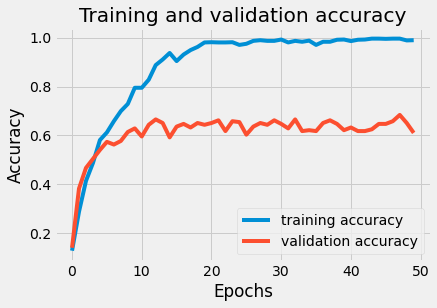

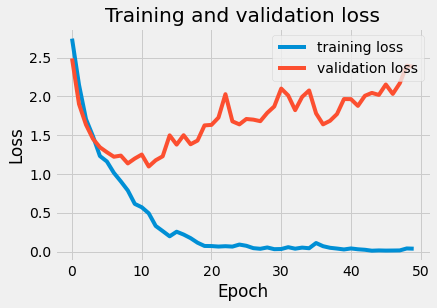

In [79]:
plot_accuracy_loss(cnn_history)

### Confusion matrix


In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
num_classes=17

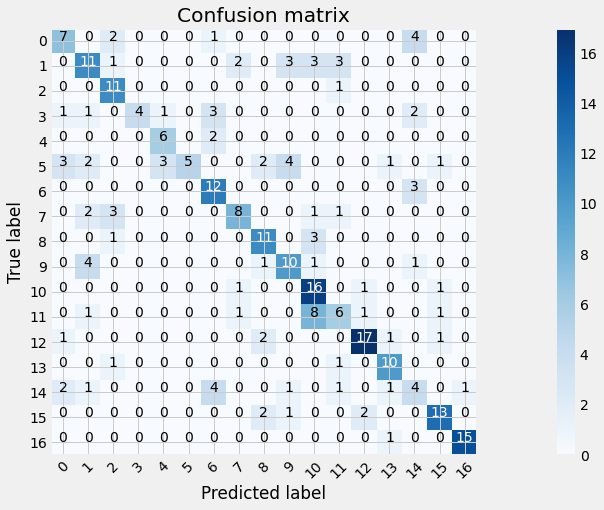

In [83]:

import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

# Predict the values from the validation dataset
y_pred = cnn_model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_one_hot,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(17))

In [391]:
# confusion matrix

[INFO] confusion matrix


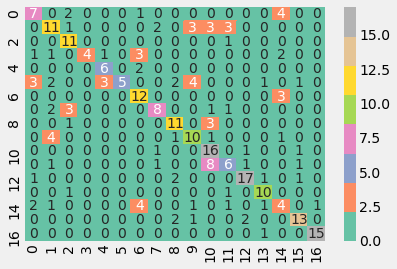

In [84]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
#labels = unique
# plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [85]:
model_performance_flower_cl=model_performance_flower_cl.append({'Model':'CNN',
                                              'Accuracy': cnn_train_acc,
                                              'Test Accuracy':cnn_test_acc,
                                              'Loss': cnn_train_loss,
                                              'Test Loss':cnn_test_loss        
                                           }, ignore_index=True)

In [86]:
model_performance_flower_cl

Model  Accuracy  Test Accuracy      Loss Test Loss
0        Logistic Regression  1.000000       0.511029        NA        NA
1       KNeighborsClassifier  0.554228       0.320000        NA        NA
2  Support Vector Classifier  1.000000       0.470588        NA        NA
3             Neural Network  0.996324       0.507353  0.016763  1.945785
4                        CNN  0.989890       0.610294  0.036458  2.379826

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

In [2]:
def predict_one_image(img, model):
  img_width=224
  img_height=224
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = model.predict(img)
  print(pred)
  class_num = np.argmax(pred)
  print(class_num)
  return class_num, np.max(pred)

In [244]:
import cv2
input_image = cv2.imread('prediction.jpg')
input_image_height, input_image_width, input_image_channels = input_image.shape

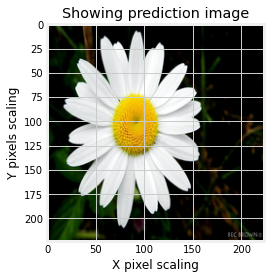

In [246]:
# Import required libraries
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title('Showing prediction image') # Adds title
plt.xlabel('X pixel scaling') # Adds X label
plt.ylabel('Y pixels scaling') # Adds y label
 
im = mpimg.imread('prediction.jpg') # Reads the image

plt.imshow(im) 

In [348]:
cnn_predict_class, cnn_pred_proba=predict_one_image(input_image,cnn_model)


[[2.5929097e-09 2.6053343e-08 9.5345688e-01 1.0034416e-17 3.3164508e-13
  5.3144469e-15 1.3364016e-17 4.0392064e-02 2.2477822e-11 4.3167070e-09
  1.3762076e-08 1.2708427e-09 6.1496366e-03 3.3337457e-17 5.3585349e-17
  1.3868837e-06 1.0143770e-22]]
2


In [350]:
print('Predicted class with cnn model',cnn_predict_class)

Predicted class with cnn model 2


In [351]:
print('Probabiliyt of predicted class with Cnn', cnn_pred_proba)

Probabiliyt of predicted class with Cnn 0.9534569


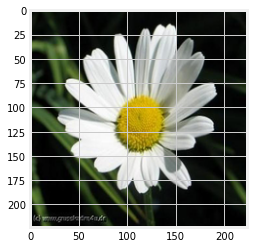

In [271]:
plt.imshow(X[261])


In [272]:
y[261]

2

Our model can predict the flower correctly as label **2**

In [87]:
model_performance_flower_cl


Model  Accuracy  Test Accuracy      Loss Test Loss
0        Logistic Regression  1.000000       0.511029        NA        NA
1       KNeighborsClassifier  0.554228       0.320000        NA        NA
2  Support Vector Classifier  1.000000       0.470588        NA        NA
3             Neural Network  0.996324       0.507353  0.016763  1.945785
4                        CNN  0.989890       0.610294  0.036458  2.379826

### Conclusion

In this project, we learned to use different approaches to train and classify the Oxflower dataset. Among various models, tried CNN performed better in Test Data. Maximum accuracy of **61.20%** achieved. Where as train accuracy is **98.98%. **

**Advantages of Convolutional Neural network**

*  The model able to predict the Flower as label 2
*  CNN model accuracy is better than the ANN model
*  CNN is more powerful in classification problem than ANN
*  CNN automatically detects important features without Human supervision

The **CNN model** Able to predict the prediction class correctly, that is been verified by verifying the same image in the data set with its label.
